**Import library**

In [ ]:
!nvidia-smi

Thu Nov 24 19:05:46 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  A100-SXM4-40GB      Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    44W / 400W |      0MiB / 40536MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install ktrain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 25.3 MB 1.3 MB/s 
     |████████████████████████████████| 981 kB 72.5 MB/s 
     |████████████████████████████████| 263 kB 77.9 MB/s 
     |████████████████████████████████| 3.8 MB 55.6 MB/s 
     |████████████████████████████████| 1.3 MB 70.2 MB/s 
     |████████████████████████████████| 468 kB 66.7 MB/s 
     |████████████████████████████████| 182 kB 83.4 MB/s 
     |████████████████████████████████| 880 kB 82.5 MB/s 
     |████████████████████████████████| 7.6 MB 65.5 MB/s 
  Created wheel for ktrain: filename=ktrain-0.31.10-py3-none-any.whl size=25312982 sha256=24783493566fdb144bdefc95569916c8922bc6583a487af64c227682cf7e2655
  Stored in directory: /root/.cache/pip/wheels/9c/1c/1b/6df2db85720b8f5c6ea5e3ae37313cfc656f248abf910b7cfd
  Created wheel for keras-bert: filename=keras_bert-0.89.0-py3-none-any.whl size=33516 sha256=e83507f4bfe394b6052c368

In [ ]:
!pip install pythainlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.6 MB 29.8 MB/s 


In [ ]:
import tensorflow as tf

from pythainlp.tokenize import word_tokenize, Tokenizer

import numpy as np
import pandas as pd 

import nltk

from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')

from pythainlp.corpus.common import thai_words
from pythainlp.corpus import thai_stopwords

import seaborn as sn
import matplotlib.pyplot as plt

import pickle as p
import plotly
import plotly.graph_objs as go

from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report

from ktrain import text
import ktrain

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**Define constant value for model**

In [ ]:
EPOCHS = 100
BS = 32
DIMENSION = 100

**Read data from each dataset**

In [ ]:
df_kplus = pd.read_csv('/content/KPlus_Googleplay.csv')
df_scb = pd.read_csv('/content/SCB_Easy_Googleplay_cut.csv')
df_ktb = pd.read_csv('/content/Krungthai_next_Googleplay.csv')

**Remove some column from Kplus dataset**

In [ ]:
df_kplus.head(4)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,Class
0,9f20248d-8b73-408e-8e06-5556e5e342ad,นายมงคล เขียวบุญแย้ม,https://play-lh.googleusercontent.com/a/ALm5wu...,ชอบแอบนี้มากๆ5.5,5,0,NaN,2022-11-12 06:13:13,ขอขอบคุณ ที่ไว้วางใจใช้บริการ K PLUS ของธนาคาร...,2022-11-12 13:47:24,pos
1,864104fc-01d0-4a44-835d-f1ae41031bfd,Punpun aoorza Goodnow,https://play-lh.googleusercontent.com/a-/ACNPE...,ใช้มาตลอดพออัพเดทล่าสุดนี่เข้าไม่ได้เลยและเด้ง...,2,0,5.16.3,2022-11-12 06:07:28,ขออภัยในความไม่สะดวกที่ได้รับค่ะ เบื้องต้นรบกว...,2022-11-12 13:47:10,neg
2,8f8e9708-35aa-425d-b044-17acfa120fa2,PalmZer Ch,https://play-lh.googleusercontent.com/a-/ACNPE...,ช่วงนี้แอปชอบเปิดเอง ทั้งๆที่ไม่ได้ใช้ ขึ้นมาข...,3,0,5.16.3,2022-11-12 04:54:49,ขออภัยในความไม่สะดวกที่ได้รับนะคะ หากพบปัญหากา...,2022-11-12 16:28:57,neg
3,1225a715-8ad3-4093-90b8-71b3eeaeb7c7,ปรินทร์พร ทิพย์สุวรรณ,https://play-lh.googleusercontent.com/a-/ACNPE...,ช่วงนี้แอฟเด้งมาบ่อยเลยค่ะ ในขณะที่ใช้แอฟอื่นอ...,2,0,5.16.3,2022-11-12 04:39:23,ขออภัยในความไม่สะดวกที่ได้รับนะคะ เบื้องต้นรบก...,2022-11-12 16:28:47,neg


In [ ]:
df_kplus.rename(columns = {'at':'timestamp', 'Class':'class'}, inplace = True)
kplus_remove_columns = ['reviewId', 'userName','userImage','replyContent','repliedAt']
df_kplus.drop(kplus_remove_columns, axis=1, inplace=True)

In [ ]:
df_kplus.columns

Index(['content', 'score', 'thumbsUpCount', 'reviewCreatedVersion',
       'timestamp', 'class'],
      dtype='object')

**Remove some column from SCB dataset**

In [ ]:
df_scb.head(4)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,Score
0,bb808b6e-7b5f-4708-9cf0-cce451e6b78b,ใหม ใหม่,https://play-lh.googleusercontent.com/a-/ACNPE...,ขยันอัปเดตจัง แต่!!ไม่มีอะไรดีขึ้นเลย,1.0,0.0,3.56.0,2022-11-12 14:47:24,NaN,NaN,neg
1,00475d91-ada3-4416-b84d-6e66c8b18f2b,ความลับในใจ,https://play-lh.googleusercontent.com/a-/ACNPE...,เยี่ยม,5.0,0.0,3.56.0,2022-11-12 13:38:43,NaN,NaN,neg
2,11a3b575-57a5-4922-98b7-1d1e85c27a57,นางสาวชนานุช ดอกประทุม,https://play-lh.googleusercontent.com/a/ALm5wu...,ไม่สามารถโหลดเพื่ออัพเดทแอปได้เมมเต็ม,5.0,0.0,3.56.0,2022-11-12 13:06:09,NaN,NaN,neg
3,cf0553f1-6bcf-499f-82e3-13757311f66e,SuKuRuLo KoHeJiNaTo,https://play-lh.googleusercontent.com/a/ALm5wu...,แอปเป็นอะไรวะทำไทถึงเข้าไม่ได้อ่า แก้ไขหน่อยนะ,1.0,0.0,3.56.0,2022-11-12 13:05:33,NaN,NaN,neg


In [ ]:
df_scb.rename(columns = {'at':'timestamp', 'Score':'class'}, inplace = True)
scb_remove_columns = ['reviewId', 'userName','userImage','replyContent','repliedAt']
df_scb.drop(kplus_remove_columns, axis=1, inplace=True)

In [ ]:
df_scb.columns

Index(['content', 'score', 'thumbsUpCount', 'reviewCreatedVersion',
       'timestamp', 'class'],
      dtype='object')

**Remove some column from KTB dataset**

In [ ]:
df_ktb.head(4)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,Time Stamp,Label,Unnamed: 9
0,bdfd375a-701e-4bc4-a5ff-ac1405a4f063,สุริยา ณ.สมุทร,https://play-lh.googleusercontent.com/a-/ACNPE...,ดี,5,0,11.9.1,2022-11-12 07:17:54,pos,NaN
1,9181b9cf-bc01-4b90-bc65-aa67ae5ebb81,Jumlean Luecha,https://play-lh.googleusercontent.com/a/ALm5wu...,Good,5,0,11.9.1,2022-11-12 06:53:18,pos,NaN
2,f14a5783-0f0f-4c1c-b9d4-7ea0d78f52cf,SAMLEE TRUDMAKKA,https://play-lh.googleusercontent.com/a/ALm5wu...,ให้บริการดีขอบคุณมากค่ะ,5,0,11.9.1,2022-11-12 06:50:52,pos,NaN
3,3ad1db88-f0c1-4e0f-8853-92352f070acc,มาหามะรอมือลี เห็ง,https://play-lh.googleusercontent.com/a/ALm5wu...,รุ่.,4,0,11.6.3,2022-11-12 06:27:40,?,NaN


In [ ]:
df_ktb.rename(columns = {'Time Stamp':'timestamp', 'Label':'class'}, inplace = True)
ktb_remove_columns = ['reviewId', 'userName','userImage','Unnamed: 9']
df_ktb.drop(ktb_remove_columns, axis=1, inplace=True)

In [ ]:
df_ktb.columns

Index(['content', 'score', 'thumbsUpCount', 'reviewCreatedVersion',
       'timestamp', 'class'],
      dtype='object')

**Merged dataset into dataframe**

In [ ]:
df = pd.concat([df_kplus, df_scb, df_ktb], ignore_index=True, sort=False)

In [ ]:
df.head()

,content,score,thumbsUpCount,reviewCreatedVersion,timestamp,class
0,ชอบแอบนี้มากๆ5.5,5.0,0.0,NaN,2022-11-12 06:13:13,pos
1,ใช้มาตลอดพออัพเดทล่าสุดนี่เข้าไม่ได้เลยและเด้ง...,2.0,0.0,5.16.3,2022-11-12 06:07:28,neg
2,ช่วงนี้แอปชอบเปิดเอง ทั้งๆที่ไม่ได้ใช้ ขึ้นมาข...,3.0,0.0,5.16.3,2022-11-12 04:54:49,neg
3,ช่วงนี้แอฟเด้งมาบ่อยเลยค่ะ ในขณะที่ใช้แอฟอื่นอ...,2.0,0.0,5.16.3,2022-11-12 04:39:23,neg
4,ดี,5.0,0.0,5.16.3,2022-11-12 04:34:57,pos


**Check data type**

In [ ]:
df.dtypes

content                  object
score                   float64
thumbsUpCount           float64
reviewCreatedVersion     object
timestamp                object
class                    object
dtype: object

**Check null value and clean column**

In [ ]:
df.isnull().sum()

content                   1
score                     1
thumbsUpCount             1
reviewCreatedVersion    751
timestamp                 1
class                     8
dtype: int64

In [ ]:
df['content'] = df['content'].astype('str') 
df['content'] = df['content'].replace(np.nan,"")

In [ ]:
df['score'] = df['score'].replace(np.nan,0)

In [ ]:
df['thumbsUpCount'] = df['thumbsUpCount'].replace(np.nan,0)

In [ ]:
df['reviewCreatedVersion'] = df['reviewCreatedVersion'].astype('str') 
df['reviewCreatedVersion'] = df['reviewCreatedVersion'].replace("nan","0.0.0")
df['reviewCreatedVersion'] = df['reviewCreatedVersion'].replace("","0.0.0")

In [ ]:
df['timestamp'] = df['timestamp'].astype('str') 
df['timestamp'] = df['timestamp'].replace(np.nan,"")

In [ ]:
df['class'].value_counts()

pos    1800
neg    1522
?       214
xxx       6
Name: class, dtype: int64

In [ ]:
df['class'] = df['class'].astype('str') 
df['class'] = df['class'].replace("nan","?")
df['class'] = df['class'].replace("xxx","?")

In [ ]:
df['class'].value_counts()

pos    1800
neg    1522
?       228
Name: class, dtype: int64

In [ ]:
df.isnull().sum()

content                 0
score                   0
thumbsUpCount           0
reviewCreatedVersion    0
timestamp               0
class                   0
dtype: int64

**From above class value count**

* We should sample class with equal row number. (pos=1522, neg=1522)
* For alternative class("?"), predict in next model

In [ ]:
pos_df = df[df['class'] == "pos"].sample(1522, random_state = 42)
pos_df

,content,score,thumbsUpCount,reviewCreatedVersion,timestamp,class
3110,ถูกใจ,5.0,0.0,11.9.1,2022-10-25 07:29:15,pos
1756,ใช้ด้ดีมากๆ,5.0,0.0,3.60.0,2022-10-31 06:56:03,pos
1641,สดวกใช้ง่าย,5.0,0.0,3.60.0,2022-11-04 19:25:52,pos
293,ดี,5.0,0.0,5.16.1,2022-11-06 18:19:54,pos
2335,ฉันชอบมากทุกวัน❤️❤️❤️,5.0,1.0,3.59.0,2022-10-07 05:03:46,pos
...,...,...,...,...,...,...
3516,ขอบคุณครับ,5.0,0.0,11.9.1,2022-10-11 10:17:21,pos
3339,ใช้แล้วดี,3.0,0.0,11.8.1,2022-10-18 12:54:47,pos
1017,ยอดเยี่ยมชอบมาก,5.0,0.0,5.16.1,2022-10-22 10:45:54,pos
1731,ดีมาก,5.0,0.0,3.60.0,2022-10-31 22:57:43,pos


In [ ]:
neg_df = df[df['class'] == "neg"].sample(1522, random_state = 42)
neg_df

,content,score,thumbsUpCount,reviewCreatedVersion,timestamp,class
1347,พอจะรีบใช้งาน มีปัญหาทุกครั้ง,1.0,0.0,5.16.1,2022-10-16 10:02:21,neg
2536,อัปเดตแทนที่แอพพลิเคชันจะดีกว่าเดิมแต่ยิ่งอัปเ...,1.0,7.0,3.59.0,2022-09-30 07:32:45,neg
3366,ทำมัยเบอร์ต้องตรงเวลาสำคัญทำไม่ได้เลยแย่มากๆ,1.0,0.0,11.9.1,2022-10-17 14:05:44,neg
2770,มีปัญหาอยู่อย่างหนึ่งและก้เปนอยู่บ่อยๆ..เวลาโอ...,3.0,6.0,11.9.1,2022-11-03 03:47:13,neg
2411,อยู่ดีๆแอปก้อล็อคเองเฉย 😒😒,2.0,0.0,0.0.0,2022-10-04 11:40:20,neg
...,...,...,...,...,...,...
2595,ห่วยแตกโอนเงินไม่เข้า,1.0,0.0,0.0.0,2022-11-11 00:28:13,neg
3043,สิ้นเดือนมีปัญหาตลอด ทำไมไม่เคยหาทางแก้ไขเนี่ย...,1.0,0.0,11.9.1,2022-10-25 08:52:53,neg
2143,และ app เป็นไรชอบล่มตอน 23:00 น กับเที่ยงคืนแล...,1.0,0.0,0.0.0,2022-10-12 18:49:26,neg
3329,แย่ชิปหาย ปรุงเถอะ เวลาเปลี่ยนเครื่องยังต้องแส...,1.0,6.0,11.9.1,2022-10-19 01:49:12,neg


In [ ]:
unknown_df = df[df['class'] == "?"]
unknown_df

,content,score,thumbsUpCount,reviewCreatedVersion,timestamp,class
84,CC6844421,5.0,0.0,5.16.3,2022-11-10 18:04:18,?
94,ิอิอิ,5.0,0.0,5.16.3,2022-11-10 14:18:38,?
144,i ij!!,3.0,0.0,5.16.1,2022-11-09 19:25:31,?
147,ดี,4.0,0.0,0.0.0,2022-11-09 15:16:32,?
164,~ช,5.0,0.0,5.16.1,2022-11-09 10:29:10,?
...,...,...,...,...,...,...
3524,กู้เงินสินเชื่อ,4.0,0.0,0.0.0,2022-10-11 05:17:39,?
3526,ลองใช้ก่อน,1.0,0.0,0.0.0,2022-10-11 04:44:04,?
3527,11/10/22 09:00-09:46เข้าแอพไม่ได้ครับ,3.0,0.0,11.5.5,2022-10-11 02:46:25,?
3541,ตคคตจ,4.0,0.0,11.9.1,2022-10-10 09:51:25,?


**Text PreProcessing**
*   Removing Punctuations
*   Change Case
*   Tokenization
*   Removing Stop Words
*   Lemmatization

In [ ]:
sentiment_df = pd.concat([neg_df, pos_df])
sentiment_df

,content,score,thumbsUpCount,reviewCreatedVersion,timestamp,class
1347,พอจะรีบใช้งาน มีปัญหาทุกครั้ง,1.0,0.0,5.16.1,2022-10-16 10:02:21,neg
2536,อัปเดตแทนที่แอพพลิเคชันจะดีกว่าเดิมแต่ยิ่งอัปเ...,1.0,7.0,3.59.0,2022-09-30 07:32:45,neg
3366,ทำมัยเบอร์ต้องตรงเวลาสำคัญทำไม่ได้เลยแย่มากๆ,1.0,0.0,11.9.1,2022-10-17 14:05:44,neg
2770,มีปัญหาอยู่อย่างหนึ่งและก้เปนอยู่บ่อยๆ..เวลาโอ...,3.0,6.0,11.9.1,2022-11-03 03:47:13,neg
2411,อยู่ดีๆแอปก้อล็อคเองเฉย 😒😒,2.0,0.0,0.0.0,2022-10-04 11:40:20,neg
...,...,...,...,...,...,...
3516,ขอบคุณครับ,5.0,0.0,11.9.1,2022-10-11 10:17:21,pos
3339,ใช้แล้วดี,3.0,0.0,11.8.1,2022-10-18 12:54:47,pos
1017,ยอดเยี่ยมชอบมาก,5.0,0.0,5.16.1,2022-10-22 10:45:54,pos
1731,ดีมาก,5.0,0.0,3.60.0,2022-10-31 22:57:43,pos


In [ ]:
sentiment_df['clean_comments'] = sentiment_df['content'].fillna('').apply(lambda x: x.lower())
sentiment_df.head()

,content,score,thumbsUpCount,reviewCreatedVersion,timestamp,class,clean_comments
1347,พอจะรีบใช้งาน มีปัญหาทุกครั้ง,1.0,0.0,5.16.1,2022-10-16 10:02:21,neg,พอจะรีบใช้งาน มีปัญหาทุกครั้ง
2536,อัปเดตแทนที่แอพพลิเคชันจะดีกว่าเดิมแต่ยิ่งอัปเ...,1.0,7.0,3.59.0,2022-09-30 07:32:45,neg,อัปเดตแทนที่แอพพลิเคชันจะดีกว่าเดิมแต่ยิ่งอัปเ...
3366,ทำมัยเบอร์ต้องตรงเวลาสำคัญทำไม่ได้เลยแย่มากๆ,1.0,0.0,11.9.1,2022-10-17 14:05:44,neg,ทำมัยเบอร์ต้องตรงเวลาสำคัญทำไม่ได้เลยแย่มากๆ
2770,มีปัญหาอยู่อย่างหนึ่งและก้เปนอยู่บ่อยๆ..เวลาโอ...,3.0,6.0,11.9.1,2022-11-03 03:47:13,neg,มีปัญหาอยู่อย่างหนึ่งและก้เปนอยู่บ่อยๆ..เวลาโอ...
2411,อยู่ดีๆแอปก้อล็อคเองเฉย 😒😒,2.0,0.0,0.0.0,2022-10-04 11:40:20,neg,อยู่ดีๆแอปก้อล็อคเองเฉย 😒😒


In [ ]:
pun = '"#\'()*,-.;<=>[\\]^_`{|}~'
pun

'"#\'()*,-.;<=>[\\]^_`{|}~'

In [ ]:
sentiment_df['clean_comments'] = sentiment_df['clean_comments'].str.replace(r'[%s]' % (pun), '', regex=True)
sentiment_df.sample(5)

,content,score,thumbsUpCount,reviewCreatedVersion,timestamp,class,clean_comments
467,เข้าไม่ได้เลยวันนี้ทั้งวันแล้ว ถอนการติดตั้งแล...,1.0,0.0,0.0.0,2022-11-04 14:01:58,neg,เข้าไม่ได้เลยวันนี้ทั้งวันแล้ว ถอนการติดตั้งแล...
2527,แอพล้มบ่อยที่สุด ล้มนานที่สุด และจะล้มทุกสิ้นเ...,1.0,1.0,3.59.0,2022-09-30 11:43:20,neg,แอพล้มบ่อยที่สุด ล้มนานที่สุด และจะล้มทุกสิ้นเ...
3006,วันนี้เงินเข้าบัญชีอัปเดตช้ามาก เงินโอนมาตั้งน...,2.0,10.0,11.9.1,2022-10-25 18:11:00,neg,วันนี้เงินเข้าบัญชีอัปเดตช้ามาก เงินโอนมาตั้งน...
522,อยู่ๆแอพเด้งขึ้นเอง แย่มาก,1.0,0.0,0.0.0,2022-11-03 15:32:25,neg,อยู่ๆแอพเด้งขึ้นเอง แย่มาก
399,Chumporn 7,5.0,0.0,0.0.0,2022-11-05 10:08:16,neg,chumporn 7


Delete stopword

In [ ]:
custom_words_list = set(thai_words())
len(custom_words_list)

62055

In [ ]:
custom_tokenizer = Tokenizer(custom_words_list)

In [ ]:
sentiment_df['clean_comments'] = sentiment_df['clean_comments'].apply(lambda x: custom_tokenizer.word_tokenize(x))

In [ ]:
sentiment_df.sample(5)

,content,score,thumbsUpCount,reviewCreatedVersion,timestamp,class,clean_comments
3038,อัปเดตบ่อยเกินจะโอนเงินก็ยังไม่ได้ ทำเพื่อเบื่...,2.0,0.0,11.5.1,2022-10-25 09:02:30,neg,"[อัปเดต, บ่อย, เกิน, จะ, โอน, เงิน, ก็, ยัง, ไ..."
40,แย่มากๆแอ๊ปล่มบ่อย,1.0,0.0,5.16.3,2022-11-11 14:05:47,neg,"[แย่มาก, ๆแอ๊ป, ล่ม, บ่อย]"
1634,แ ฟำ,1.0,0.0,3.53.0,2022-11-05 02:55:20,pos,"[แ, , ฟำ]"
2042,ขอบคุณ,5.0,0.0,3.59.0,2022-10-17 13:07:13,pos,[ขอบคุณ]
3521,ดีมากๆเลยครับ.,5.0,0.0,11.8.1,2022-10-11 05:19:23,pos,"[ดีมาก, ๆ, เลย, ครับ]"


In [ ]:
tokenized_doc = sentiment_df['clean_comments']
tokenized_doc[:10]

1347          [พอ, จะ, รีบ, ใช้งาน,  , มีปัญหา, ทุกครั้ง]
2536    [อัปเดต, แทนที่, แอพพลิเคชัน, จะ, ดีกว่า, เดิม...
3366    [ทำ, มัย, เบอร์, ต้อง, ตรงเวลา, สำคัญ, ทำ, ไม่...
2770    [มีปัญหา, อยู่, อย่างหนึ่ง, และ, ก้เปน, อยู่, ...
2411         [อยู่ดีๆ, แอ, ป, ก้อ, ล็อค, เอง, เฉย,  , 😒😒]
1054    [ใช้, ยุ่งยาก, ชิบหาย,  , บาง, คนใช้, รายเดือน...
2134    [ทำไม, ต้อง, ติดต่อ, ธนาคาร, ครับ, เข้าไป, แล้...
3440                                [ระบบ, ช้า, มาก, ค่ะ]
2447    [แอ, ป, มี, ปัญญา, หา, อะไร, หนักหนา, ครับ, ล่...
2514    [จำได้, ว่า, เคย, ให้คะแนน, แอ, ป, ดีมาก,  , แ...
Name: clean_comments, dtype: object

Delete english stop word

In [ ]:
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])

In [ ]:
tokenized_doc[:10]

1347          [พอ, จะ, รีบ, ใช้งาน,  , มีปัญหา, ทุกครั้ง]
2536    [อัปเดต, แทนที่, แอพพลิเคชัน, จะ, ดีกว่า, เดิม...
3366    [ทำ, มัย, เบอร์, ต้อง, ตรงเวลา, สำคัญ, ทำ, ไม่...
2770    [มีปัญหา, อยู่, อย่างหนึ่ง, และ, ก้เปน, อยู่, ...
2411         [อยู่ดีๆ, แอ, ป, ก้อ, ล็อค, เอง, เฉย,  , 😒😒]
1054    [ใช้, ยุ่งยาก, ชิบหาย,  , บาง, คนใช้, รายเดือน...
2134    [ทำไม, ต้อง, ติดต่อ, ธนาคาร, ครับ, เข้าไป, แล้...
3440                                [ระบบ, ช้า, มาก, ค่ะ]
2447    [แอ, ป, มี, ปัญญา, หา, อะไร, หนักหนา, ครับ, ล่...
2514    [จำได้, ว่า, เคย, ให้คะแนน, แอ, ป, ดีมาก,  , แ...
Name: clean_comments, dtype: object

Delete thai stop word

In [ ]:
th_stop_words = list(thai_stopwords())
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in th_stop_words])

In [ ]:
tokenized_doc[:10]

1347                            [รีบ, ใช้งาน,  , มีปัญหา]
2536    [อัปเดต, แทนที่, แอพพลิเคชัน, ดีกว่า, เดิม, อั...
3366                [ทำ, มัย, เบอร์, ตรงเวลา, ทำ, แย่มาก]
2770    [มีปัญหา, ก้เปน, เวลา, โอน, เสด, สลิป, ภาพ, หา...
2411                   [อยู่ดีๆ, แอ, ป, ก้อ, ล็อค,  , 😒😒]
1054    [ยุ่งยาก, ชิบหาย,  , คนใช้, รายเดือน,  , เติม,...
2134     [ติดต่อ, ธนาคาร, เข้าไป, แล้วก็, ติดต่อ, ธนาคาร]
3440                                               [ระบบ]
2447    [แอ, ป, ปัญญา, หา, หนักหนา, ล่ม, หยุด, จ่าย, ล...
2514    [จำได้, ให้คะแนน, แอ, ป, ดีมาก,  , ตอนนี้, ติด...
Name: clean_comments, dtype: object

In [ ]:
tokenized_doc = tokenized_doc.to_list()

In [ ]:
# de-tokenization
detokenized_doc = []
for i in range(len(tokenized_doc)):
#     print(tokenized_doc[i])
    t = ''.join(tokenized_doc[i])
    detokenized_doc.append(t)
    
sentiment_df['clean_comments'] = detokenized_doc

In [ ]:
sentiment_df.head()

,content,score,thumbsUpCount,reviewCreatedVersion,timestamp,class,clean_comments
1347,พอจะรีบใช้งาน มีปัญหาทุกครั้ง,1.0,0.0,5.16.1,2022-10-16 10:02:21,neg,รีบใช้งาน มีปัญหา
2536,อัปเดตแทนที่แอพพลิเคชันจะดีกว่าเดิมแต่ยิ่งอัปเ...,1.0,7.0,3.59.0,2022-09-30 07:32:45,neg,อัปเดตแทนที่แอพพลิเคชันดีกว่าเดิมอัปเดตแย่ธนาค...
3366,ทำมัยเบอร์ต้องตรงเวลาสำคัญทำไม่ได้เลยแย่มากๆ,1.0,0.0,11.9.1,2022-10-17 14:05:44,neg,ทำมัยเบอร์ตรงเวลาทำแย่มาก
2770,มีปัญหาอยู่อย่างหนึ่งและก้เปนอยู่บ่อยๆ..เวลาโอ...,3.0,6.0,11.9.1,2022-11-03 03:47:13,neg,มีปัญหาก้เปนเวลาโอนเสดสลิปภาพหายภาพครึ่งก้ตงเว...
2411,อยู่ดีๆแอปก้อล็อคเองเฉย 😒😒,2.0,0.0,0.0.0,2022-10-04 11:40:20,neg,อยู่ดีๆแอปก้อล็อค 😒😒


In [ ]:
temp_df = sentiment_df

sentiment_df = temp_df.sample(2435, random_state = 42)
test_df = temp_df.sample(609, random_state = 42) #total 3044 rows, train 609 rows, test 2435 rows

In [ ]:
def max_length(words):
    return(len(max(words, key = len)))

In [ ]:
max_length = max_length(tokenized_doc)
max_length

132

In [ ]:
encoded_columns = pd.get_dummies(sentiment_df['class'])
sentiment_df = sentiment_df.join(encoded_columns)

In [ ]:
sentiment_df.head()

,content,score,thumbsUpCount,reviewCreatedVersion,timestamp,class,clean_comments,neg,pos
2748,สแกนใบหน้าไม่ดีระบบควรปรับปรุง,1.0,0.0,11.9.1,2022-11-04 06:45:23,neg,สแกนใบหน้าดีระบบปรับปรุง,1,0
2694,ใช้งานสะดวกสบาย,5.0,0.0,11.9.1,2022-11-06 17:08:55,pos,ใช้งานสะดวกสบาย,0,1
1931,แย่มาก​ ปรับปรุงไห้ทัน​ค่ายอื่นด้วยค่ะ​,1.0,0.0,0.0.0,2022-10-22 13:27:32,neg,แย่มาก​ ปรับปรุงไห้​ค่าย​,1,0
1575,ปิดปรับปรุงบ่อยมากคะแข้ไขั,3.0,0.0,0.0.0,2022-11-09 10:37:38,neg,ปรับปรุงแข้ไขั,1,0
1934,โหลดไม่ได้,5.0,0.0,3.59.0,2022-10-22 10:12:28,neg,โหลด,1,0


**Train and validation split**

In [ ]:
(train_X, train_Y), (val_X, val_Y), preproc = text.texts_from_df(sentiment_df, 
                                                                 'content',
                                                                 label_columns=['neg', 'pos'],
                                                                 preprocess_mode='bert')

['neg', 'pos']
      neg  pos
352     1    0
1301    0    1
2044    1    0
3483    0    1
3250    1    0
['neg', 'pos']
      neg  pos
3249    1    0
17      0    1
1040    0    1
2394    1    0
2568    0    1
downloading pretrained BERT model (multi_cased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: th


Is Multi-Label? False
preprocessing test...
language: th


In [ ]:
print("Len of train_X = %d and train_Y = %d" % (len(train_X), len(train_Y)))
print("Len of val_X = %d and val_Y = %d" % (len(val_X), len(val_Y)))

Len of train_X = 2 and train_Y = 2191
Len of val_X = 2 and val_Y = 244


**Define BERT model**

In [ ]:
model = text.text_classifier('bert', train_data=(train_X, train_Y), preproc=preproc)

Is Multi-Label? False
maxlen is 400
done.


In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Input-Token (InputLayer)       [(None, 400)]        0           []                               
                                                                                                  
 Input-Segment (InputLayer)     [(None, 400)]        0           []                               
                                                                                                  
 Embedding-Token (TokenEmbeddin  [(None, 400, 768),  91812096    ['Input-Token[0][0]']            
 g)                              (119547, 768)]                                                   
                                                                                                  
 Embedding-Segment (Embedding)  (None, 400, 768)     1536        ['Input-Segment[0][0]']    

In [ ]:
learner = ktrain.get_learner(model, train_data=(train_X, train_Y),val_data=(val_X, val_Y), batch_size=6)

simulating training for different learning rates... this may take a few moments...
Epoch 1/1024
366/366 [==============================] - 62s 102ms/step - loss: 0.5574 - accuracy: 0.7074
Epoch 2/1024
366/366 [==============================] - 37s 101ms/step - loss: 0.3038 - accuracy: 0.8845
Epoch 3/1024
366/366 [==============================] - 37s 101ms/step - loss: 0.9013 - accuracy: 0.5326
Epoch 4/1024
366/366 [==============================] - 1s 3ms/step - loss: 1.6890 - accuracy: 0.4872


done.
Visually inspect loss plot and select learning rate associated with falling loss


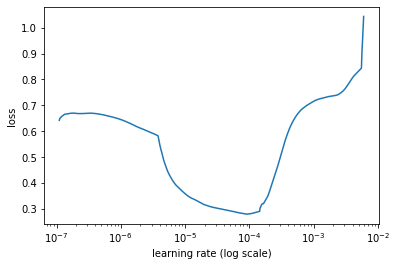

In [ ]:
learner.lr_find(show_plot=True)

In [ ]:
hist3 = learner.autofit(5e-5, 2, checkpoint_folder='bert_workshop')



begin training using triangular learning rate policy with max lr of 5e-05...
Epoch 1/2
366/366 [==============================] - 63s 120ms/step - loss: 0.3010 - accuracy: 0.8713 - val_loss: 0.2105 - val_accuracy: 0.9426
Epoch 2/2
366/366 [==============================] - 40s 108ms/step - loss: 0.2057 - accuracy: 0.9279 - val_loss: 0.2345 - val_accuracy: 0.9303


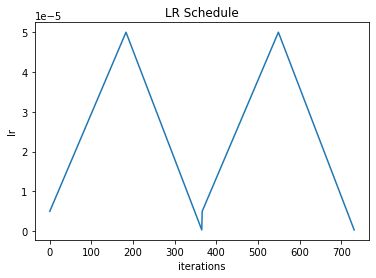

In [ ]:
learner.plot('lr')

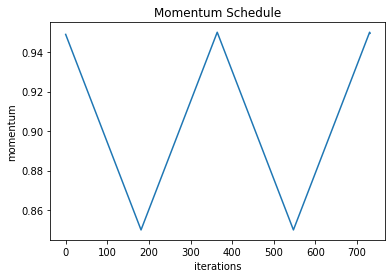

In [ ]:
learner.plot('momentum')

In [ ]:
h1 = go.Scatter(y=hist3.history['loss'], 
                    mode="lines", line=dict(
                    width=2,
                    color='blue'),
                    name="loss"
                   )
h2 = go.Scatter(y=hist3.history['val_loss'], 
                    mode="lines", line=dict(
                    width=2,
                    color='red'),
                    name="val_loss"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Loss',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig1 = go.Figure(data = data, layout=layout1)
fig1.show()

In [ ]:
h1 = go.Scatter(y=hist3.history['accuracy'], 
                    mode="lines", line=dict(
                    width=2,
                    color='blue'),
                    name="acc"
                   )
h2 = go.Scatter(y=hist3.history['val_accuracy'], 
                    mode="lines", line=dict(
                    width=2,
                    color='red'),
                    name="val_acc"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Accuracy',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig1 = go.Figure(data = data, layout=layout1)
fig1.show()

In [ ]:
model.load_weights('bert_workshop/weights-01.hdf5')

In [ ]:
learner = ktrain.get_learner(model, train_data=(train_X, train_Y),val_data=(val_X, val_Y), batch_size=6)

In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc)

In [ ]:
cat = predictor.get_classes()
cat

['neg', 'pos']

In [ ]:
learner.validate(val_data=(val_X, val_Y), class_names=cat)

8/8 [==============================] - 5s 115ms/step
              precision    recall  f1-score   support

         neg       0.92      0.97      0.95       125
         pos       0.96      0.92      0.94       119

    accuracy                           0.94       244
   macro avg       0.94      0.94      0.94       244
weighted avg       0.94      0.94      0.94       244



array([[121,   4],
       [ 10, 109]])

In [ ]:
predictor.predict_proba("ฝ้ายจะไม่ทน กับคนนิสัยไม่ดี") 

1/1 [==============================] - 0s 30ms/step


array([0.98624253, 0.01375746], dtype=float32)

In [ ]:
predictor.predict("ฝ้ายจะไม่ทน กับคนนิสัยไม่ดี") 

1/1 [==============================] - 0s 35ms/step


'neg'

In [ ]:
pretrain_name = 'bert_sentiment'

In [ ]:
predictor.save(pretrain_name)

In [ ]:
reloaded_predictor = ktrain.load_predictor(pretrain_name)

In [ ]:
reloaded_predictor.predict("ฝ้ายจะไม่ทน กับคนนิสัยไม่ดี")

1/1 [==============================] - 4s 4s/step


'neg'

In [ ]:
x_test = test_df['clean_comments'].to_list()
x_test[:5]

['สแกนใบหน้าไม่ดีระบบควรปรับปรุง',
 'ใช้งานสะดวกสบาย',
 'แย่มาก\u200b ปรับปรุงไห้ทัน\u200bค่ายอื่นด้วยค่ะ\u200b',
 'ปิดปรับปรุงบ่อยมากคะแข้ไขั',
 'โหลดไม่ได้']

In [ ]:
y_test = test_df['class'].to_list()

In [ ]:
preds = reloaded_predictor.predict(x_test)

20/20 [==============================] - 2s 115ms/step


In [ ]:
cm = confusion_matrix(y_test, preds)

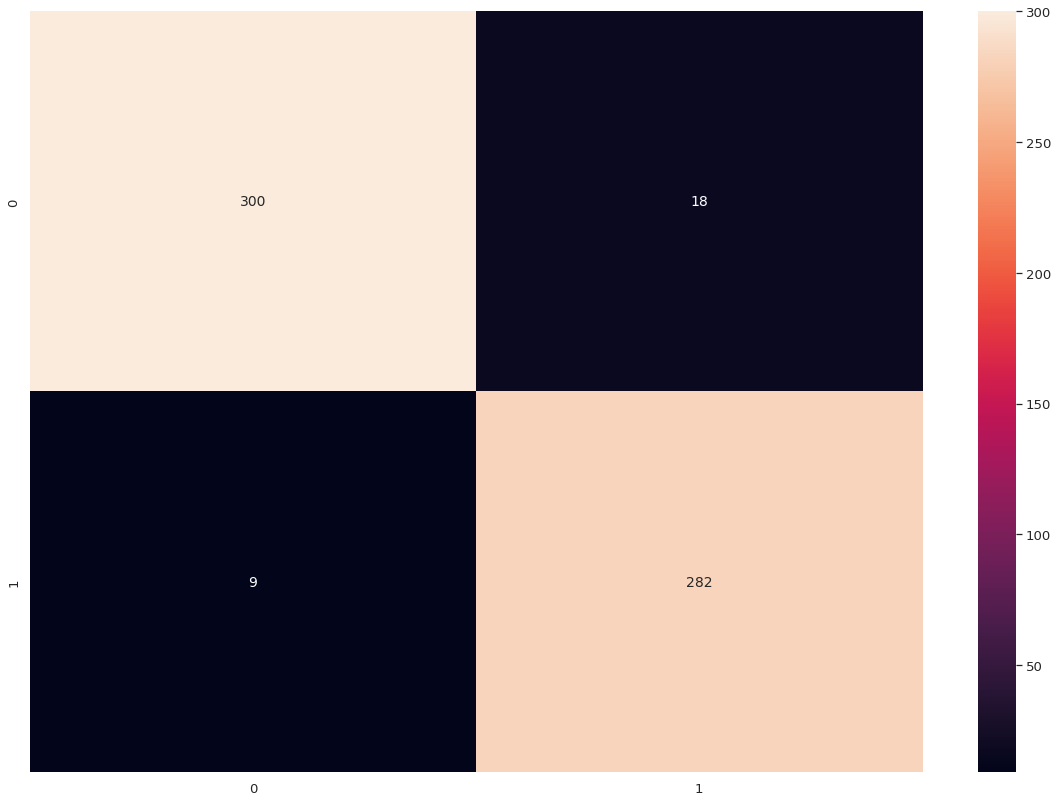

In [ ]:
df_cm = pd.DataFrame(cm, range(2), range(2))
plt.figure(figsize=(20,14))
sn.set(font_scale=1.2) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 14}, fmt='g') # for num predict size

plt.show()

In [ ]:
print(classification_report(y_test, preds, target_names=cat, digits=4))

              precision    recall  f1-score   support

         neg     0.9709    0.9434    0.9569       318
         pos     0.9400    0.9691    0.9543       291

    accuracy                         0.9557       609
   macro avg     0.9554    0.9562    0.9556       609
weighted avg     0.9561    0.9557    0.9557       609

